## **Context**
A bank is interested in providing higher quality customer service to protect customers financial assets.The bank has been receiving several complaints about credit card frauds from their customers and the news media is regulaly reporting about how the bank's customers are losing large amounts of money and the bank is doing nothing to stop it.This is impacting both the customers experience and their market share.The Senior Management is asking for a deep dive into this issue.

I just got hired as the Business Analyst for the bank, and they provided me with 6 months of available data (step 0 to 179 refer to the dates). They want me to share some insights using the features in the file to determine if I can see a pattern for the fraudulent transactions. They are expecting me to provide some suggestions on how to tackle the problem.
Here's the source of the dataset :

*Data Analysis with Lopez-Rojas, Edgar Alonso ; Axelsson, Stefan*

*Banksim: A bank payments simulator for fraud detectionresearch Inproceedings*

*26thEuropeanModelingandSimulationSymposium,EMSS2014,Bordeaux,France,pp.*

*144–152, Dime University of Genoa, 2014, ISBN: 9788897999324.*


Data Analysis with Lopez-Rojas, Edgar Alonso ; Axelsson, Stefan 

Banksim: A bank payments simulator for fraud detectionresearch Inproceedings

26thEuropeanModelingandSimulationSymposium,EMSS2014,Bordeaux,France,pp.

144–152, Dime University of Genoa, 2014, ISBN: 9788897999324.

After exploring and cleaning our data a little, we're going to answer some questions...


# **Plan**

Retreve Dataset

Data cleansing

Data Processing

Data Analysis Univariate

Data Analysis Multivariate

Hypthesis Test

Feature Engineering
Model

Measure and Performence

Conclusion and Recomnandations

**Retreve Dataset**

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import xlrd
import openpyxl
import scipy.stats as stats
sns.set_style("darkgrid")
sns.set_theme(style="darkgrid")

**Data cleansing**

In [118]:
### Import the file that contains the data
project= pd.read_csv(r"BI_projectdatabon_2.csv")

In [119]:
#### Print the 5 first element of project
project.head()


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [120]:
#Function to remove unwanted characters from column value
def remove_char(dataset,cols=[],new={}):
  dataset[cols] = dataset[cols].replace(new, regex=True)
  return dataset.head()

In [121]:
###Application of the function to some columns
remove_char(project,cols=['customer','age','zipcodeOri','gender','merchant','category'],new={"'":''})

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,'28007',es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,'28007',es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,'28007',es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,'28007',es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,'28007',es_transportation,35.72,0


In [122]:
###Look for further informations about the dataset
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [123]:
###This function will calculate the single values in the different columns of the the dataset 
###@params is_number : Allows this function to return a single list
def dataset_cardinalite(dataset,is_number=True):
  # Create a dictionnary
  my_dict = dict()
  # select each column
  for col in dataset.columns:
    # Save the cardinal with the single value in this column
    if is_number:
      my_dict[col] = dataset[col].nunique()
    else:
       my_dict[col] = dataset[col].unique()
  # return this dict
  return my_dict

In [124]:
###Apply the function dataset_cardinalite
dataset_cardinalite(dataset=project,is_number=True)

{'age': 8,
 'amount': 23767,
 'category': 15,
 'customer': 4112,
 'fraud': 2,
 'gender': 4,
 'merchant': 50,
 'step': 180,
 'zipMerchant': 1,
 'zipcodeOri': 1}

In [125]:
def dataset_count(dataset,is_number=True):
  # Create a dictionnary
  my_dict = dict()
  # select each column
  for col in dataset.columns:
    # Save the cardinal with the single value in this column
    if is_number:
      my_dict[col] = dataset[col].value_counts()
    else:
       my_dict[col] = dataset[col].value_counts()
  # return this dict
  return my_dict

In [126]:
###Application of the function datasset_count
dataset_count(dataset=project,is_number=True)

{'age': 2    187310
 3    147131
 4    109025
 5     62642
 1     58131
 6     26774
 0      2452
 U      1178
 Name: age, dtype: int64, 'amount': 14.93     146
 26.67     146
 17.57     145
 17.26     143
 16.12     143
          ... 
 751.43      1
 274.43      1
 517.95      1
 105.02      1
 429.60      1
 Name: amount, Length: 23767, dtype: int64, 'category': es_transportation        505119
 es_food                   26254
 es_health                 16133
 es_wellnessandbeauty      15086
 es_fashion                 6454
 es_barsandrestaurants      6373
 es_hyper                   6098
 es_sportsandtoys           4002
 es_tech                    2370
 es_home                    1986
 es_hotelservices           1744
 es_otherservices            912
 es_contents                 885
 es_travel                   728
 es_leisure                  499
 Name: category, dtype: int64, 'customer': C1978250683    265
 C1275518867    252
 C806399525     237
 C515668508     205
 C1338396147    1

In [127]:
###Define a function to detect null values and their frequencies
def percent_colunm_null_values(data):
   result =  data.isna().sum()/data.shape[0]
   return result[result>0.0]

In [128]:
### Apply this function to the dataset
percent_colunm_null_values(data=project)

Series([], dtype: float64)

There's no null values

In [129]:
###Data cleanset
###We drop the column ZipMerchant just because it is useless for my work
project.drop(columns =["zipMerchant"],inplace=True)


In [130]:
### Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
project.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [131]:
###Rename of a column and we persist the change
project.rename(columns={"step":"day"}, inplace=True)
project

,day,customer,age,gender,zipcodeOri,merchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,28007,M1823072687,es_transportation,20.53,0
594639,179,C650108285,4,F,28007,M1823072687,es_transportation,50.73,0
594640,179,C123623130,2,F,28007,M349281107,es_fashion,22.44,0
594641,179,C1499363341,5,M,28007,M1823072687,es_transportation,14.46,0


In [132]:
#Set day in index
project_indexed=project.set_index("day")
project_indexed

,customer,age,gender,zipcodeOri,merchant,category,amount,fraud
day,,,,,,,,
0,C1093826151,4,M,28007,M348934600,es_transportation,4.55,0
0,C352968107,2,M,28007,M348934600,es_transportation,39.68,0
0,C2054744914,4,F,28007,M1823072687,es_transportation,26.89,0
0,C1760612790,3,M,28007,M348934600,es_transportation,17.25,0
0,C757503768,5,M,28007,M348934600,es_transportation,35.72,0
...,...,...,...,...,...,...,...,...
179,C1753498738,3,F,28007,M1823072687,es_transportation,20.53,0
179,C650108285,4,F,28007,M1823072687,es_transportation,50.73,0
179,C123623130,2,F,28007,M349281107,es_fashion,22.44,0


Data Processing

In [133]:
#We define a function that can generate barchart
def generate_barchart(data=project, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6),horizontal=True):
  plt.figure(figsize=figsize)
  if horizontal:
      axes = sns.barplot(data=data,x=abs_value,y=data.index,color_palette="tab10")
      i=0
      for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(tot/2,
                  i,
                  str(np.round(perc*100,2))+ "%",
                    fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                  )
        axes.text(tot+5,
                  i,
                  str(tot),
                    fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                  )
        
        i+=1
      plt.title(title)
      change_width(axes,0.35)
      plt.show()
  else:
        axes = sns.barplot(data=data,y=abs_value,x=data.index)
        i=0
        for tot, perc in zip(data[abs_value],data[rel_value]):
          axes.text(i,
                    tot/2,
                    str(np.round(perc*100,2))+ "%",
                      fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                    )
          axes.text(i,
                    tot+5,
                    str(tot),
                      fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                    )
          
          i+=1
        plt.title(title)
        plt.show() 

In [134]:
#This fucntion will show the plot and will show the probability
def prob_category(data,top_n =10,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,20),horizontal=True):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize,horizontal=horizontal)
     return result



In [135]:
#This function will changge the width of a barchart
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [136]:
### This function allow us to create a categorical values
def categorical_label(dataset=None,col_name=None,dict0=None, use_dict =False):
  if not use_dict:
   return dataset[col_name].apply(lambda x: f"{col_name} {x}" )
  else:
    return dataset[col_name].replace(dict0)

In [137]:
###Selection of the categorical columns
cat_cols = ["fraud","gender","category","age",]


In [138]:
###Print a frame with only the categorical values 
cat_project = project[cat_cols]
###Print the 5 first elements of this frame
cat_project.head()

,fraud,gender,category,age
0,0,M,es_transportation,4
1,0,M,es_transportation,2
2,0,F,es_transportation,4
3,0,M,es_transportation,3
4,0,M,es_transportation,5


In [139]:
#Transform into categorical values
for col in  project[cat_cols]:
    cat_project[f"{col}"] = categorical_label(dataset=cat_project,col_name=col,dict0 ={0:"No",1:"Yes"},use_dict=True)
    print(cat_project)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


       fraud gender           category age
0         No      M  es_transportation   4
1         No      M  es_transportation   2
2         No      F  es_transportation   4
3         No      M  es_transportation   3
4         No      M  es_transportation   5
...      ...    ...                ...  ..
594638    No      F  es_transportation   3
594639    No      F  es_transportation   4
594640    No      F         es_fashion   2
594641    No      M  es_transportation   5
594642    No      F  es_transportation   4

[594643 rows x 4 columns]
       fraud gender           category age
0         No      M  es_transportation   4
1         No      M  es_transportation   2
2         No      F  es_transportation   4
3         No      M  es_transportation   3
4         No      M  es_transportation   5
...      ...    ...                ...  ..
594638    No      F  es_transportation   3
594639    No      F  es_transportation   4
594640    No      F         es_fashion   2
594641    No      M  es_tra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Univariate Analysis**

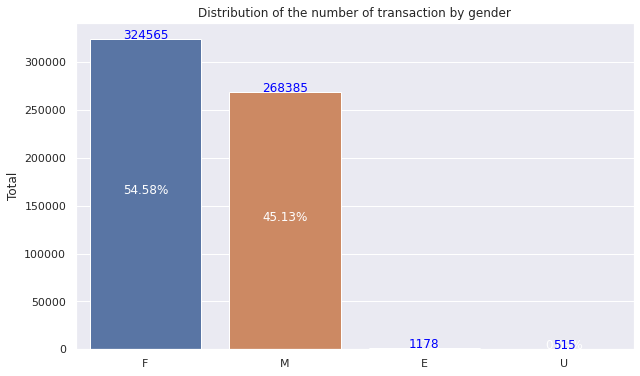

,Total,Percent
F,324565,0.545815
M,268385,0.451338
E,1178,0.001981
U,515,0.000866


In [140]:
#We are going to do a graph that show a distribution of the gender
prob_category(data=project,col="gender",show_plot=True,figsize= (10,6), title="Distribution of the number of transaction by gender",horizontal=False)

This graph shows the distribution of the transactions by gender. The percentage per women is 54.58% of the transaction. It's higher than the middle. It's relevant because we can notice that women use their credit cards more than men.

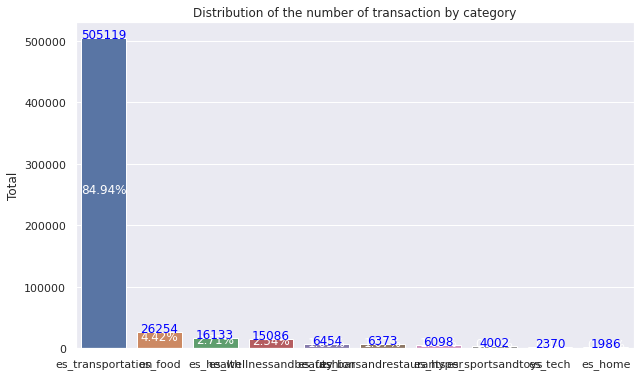

,Total,Percent
es_transportation,505119,0.849449
es_food,26254,0.044151
es_health,16133,0.027131
es_wellnessandbeauty,15086,0.025370
es_fashion,6454,0.010854
es_barsandrestaurants,6373,0.010717
es_hyper,6098,0.010255
es_sportsandtoys,4002,0.006730
es_tech,2370,0.003986
es_home,1986,0.003340


In [141]:
#We are going to do a graph that show a distribution of the of category
prob_category(data=project,col="category",show_plot=True,figsize= (10,6), title="Distribution of the number of transaction by category",horizontal=False)

This graph shows the distribution of the transactions by category. The general trend is that 84.9449% of the transaction are made in transport.

In [142]:
project[['fraud']].describe()

,fraud
count,594643.000000
mean,0.012108
std,0.109369
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


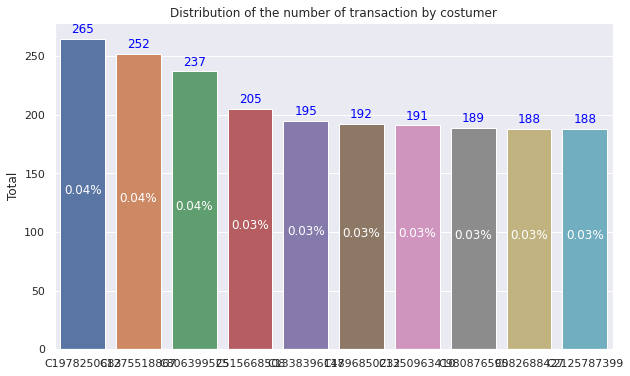

,Total,Percent
C1978250683,265,0.000446
C1275518867,252,0.000424
C806399525,237,0.000399
C515668508,205,0.000345
C1338396147,195,0.000328
C1896850232,192,0.000323
C1350963410,191,0.000321
C980876590,189,0.000318
C582688427,188,0.000316
C2125787399,188,0.000316


In [145]:
#We are going to do a graph that show a distribution of the customer
prob_category(data=project,col="customer",show_plot=True,figsize= (10,6), title="Distribution of the number of transaction by costumer",horizontal=False)

This graphs represents the number of transaction by customer. As we can see, the customer #C1978250683 and #C1275518867 have the highest percentage with 0.04%. After that the other are distributed fairly.

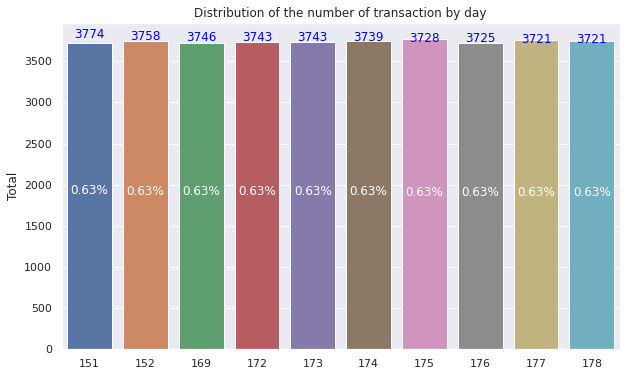

,Total,Percent
175,3774,0.006347
177,3758,0.006320
152,3746,0.006300
178,3743,0.006295
174,3743,0.006295
173,3739,0.006288
172,3728,0.006269
151,3725,0.006264
176,3721,0.006258
169,3721,0.006258


In [146]:
#We are going to do a graph that show a distribution of the step or day 
###Wwe only print the 15 higher
prob_category(data=project,col='day',show_plot=True,figsize= (10,6), title="Distribution of the number of transaction by day",horizontal=False)

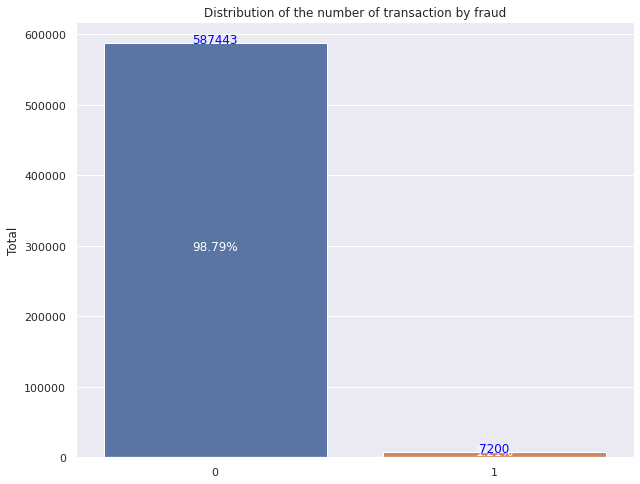

,Total,Percent
0,587443,0.987892
1,7200,0.012108


In [147]:
#We are going to do a graph that show a distribution of the transaction by fraud
prob_category(data=project,col="fraud",show_plot=True,figsize= (10,8), title="Distribution of the number of transaction by fraud",horizontal=False)

This graph shows the distribution of the transaction by fraud. As we can notice, the frequency of fraud is 1.2% that represents 7200 transactions.

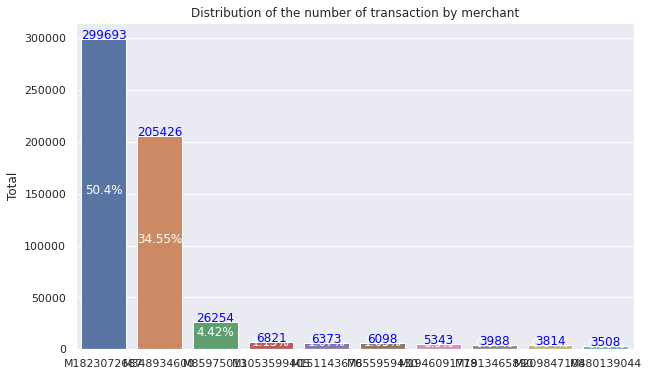

,Total,Percent
M1823072687,299693,0.503988
M348934600,205426,0.345461
M85975013,26254,0.044151
M1053599405,6821,0.011471
M151143676,6373,0.010717
M855959430,6098,0.010255
M1946091778,5343,0.008985
M1913465890,3988,0.006707
M209847108,3814,0.006414
M480139044,3508,0.005899


In [148]:
#We are going to do a graph that show a distribution of the merchant
prob_category(data=project,col="merchant",show_plot=True,figsize= (10,6), title="Distribution of the number of transaction by merchant",horizontal=False)

This graph shows the distribution of the transactions by merchant. As we can notice, the frequency of the merchant "M1823072687" is 50.39% and the merchant "M348934600" represents 34.54% of the transactions. We can conclude that more than 84% of the transaction have been registred by theses merchants.

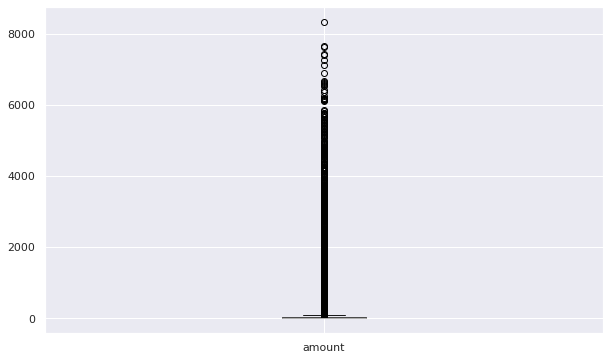

In [149]:
# Histogram with rugplot and kde 
project.boxplot(column="amount",figsize=(10,6))

The data shows that there are too many amount between 0 and 2000 $. Let's see the distribution for the fraud amounts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd552aaa4d0>]],
      dtype=object)

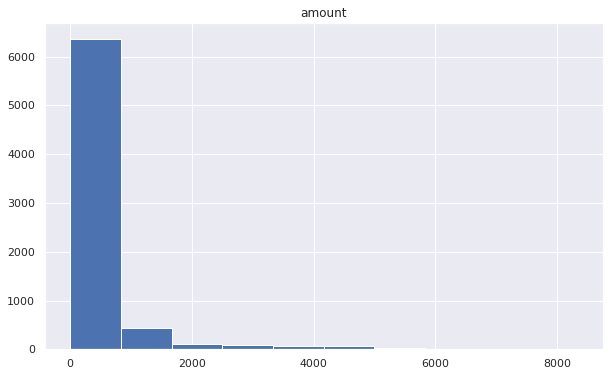

In [150]:
project[project.fraud==1].hist(column="amount", figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5529e5a90>]],
      dtype=object)

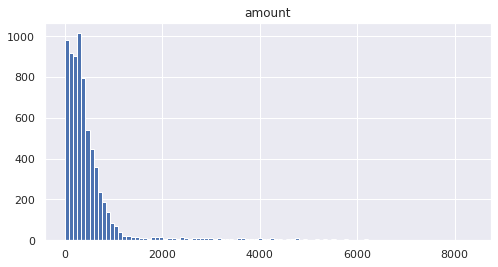

In [151]:
bins = np.linspace(project.amount.min(),project.amount.max(),100)
project[project.fraud==1].hist(column="amount", figsize=(8,4), bins=bins)

The data shows that there are more than 6000 amounts that are fraudilous between 0 and 2000 $. 

In [152]:
project.groupby(by=["category"]).amount.mean()

category
es_barsandrestaurants      43.461014
es_contents                44.547571
es_fashion                 65.666642
es_food                    37.070405
es_health                 135.621367
es_home                   165.670846
es_hotelservices          205.614249
es_hyper                   45.970421
es_leisure                288.911303
es_otherservices          135.881524
es_sportsandtoys          215.715280
es_tech                   120.947937
es_transportation          26.958187
es_travel                2250.409190
es_wellnessandbeauty       65.511221
Name: amount, dtype: float64

**Data Analysis Multivariate**

# Is there a specific ‘gender’ with a higher probability to be the victim of a fraudulent act?

In [154]:
#define a function that  can do pivot_table
def pivot(y):
  pivo=pd.pivot_table(project, values='zipcodeOri', index=['fraud'], columns=y,aggfunc='count')
  pivo=pivo.fillna(0)
  return pivo

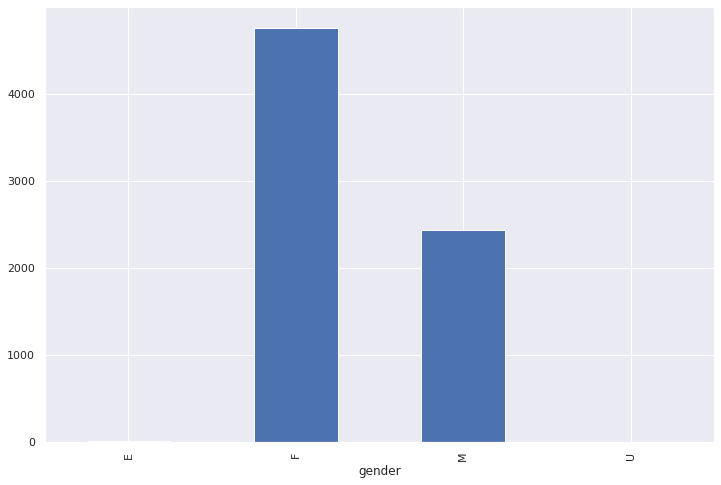

In [155]:
###Doing a pivot table with gender and fraud
l=pivot('gender')
###Transpose the dataframe
l1=l.T
###Plot the true values
l1[1].plot(kind="bar", figsize=(12,8))

In [156]:
###define a column for the sum
l1["Total"]=l1[0]+l1[1]
###Doing the frequencies of fraud and not_fraud to  each column
l1["freq_fraud_true"]=l1[1]/l1["Total"]
l1["freq_fraud_false"]=l1[0]/l1["Total"]
l1

fraud,0,1,Total,freq_fraud_true,freq_fraud_false
gender,,,,,
E,1171.0,7.0,1178.0,0.005942,0.994058
F,319807.0,4758.0,324565.0,0.014660,0.985340
M,265950.0,2435.0,268385.0,0.009073,0.990927
U,515.0,0.0,515.0,0.000000,1.000000


Women are most susceptible to be victim of fraud. On each 1000 transactions made by a female, 14.6 are fraudulous. 

# Is there a specific category with a higher probability to be the victim of a fraudulent act?

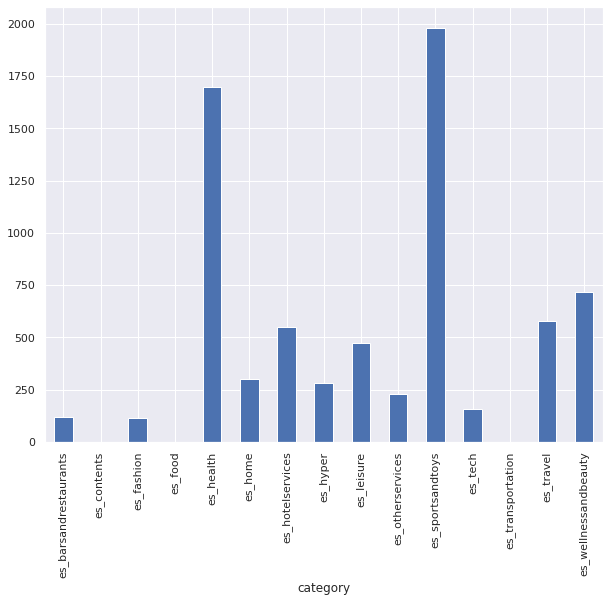

In [157]:
###Doing a pivot table with fraud and category
k=pivot('category')
###Transpose the dataframe
k1=k.T
k1[1].plot(kind="bar", figsize=(10,8))

In [158]:
###define a column for the sum
k1["cat_sum"]=k1[0]+k1[1]
###Doing the frequencies of fraud and not_fraud to  each column
k1["cat_freq_true"]=k1[1]/k1["cat_sum"]
k1["cat_freq_false"]=k1[0]/k1["cat_sum"]
k1

fraud,0,1,cat_sum,cat_freq_true,cat_freq_false
category,,,,,
es_barsandrestaurants,6253.0,120.0,6373.0,0.018829,0.981171
es_contents,885.0,0.0,885.0,0.000000,1.000000
es_fashion,6338.0,116.0,6454.0,0.017973,0.982027
es_food,26254.0,0.0,26254.0,0.000000,1.000000
es_health,14437.0,1696.0,16133.0,0.105126,0.894874
es_home,1684.0,302.0,1986.0,0.152064,0.847936
es_hotelservices,1196.0,548.0,1744.0,0.314220,0.685780
es_hyper,5818.0,280.0,6098.0,0.045917,0.954083
es_leisure,25.0,474.0,499.0,0.949900,0.050100


Leisure is the category which is the most susceptible to be victim of fraud. On each 100 transactions made by a female, 94.99 are fraudulous. 

In [159]:
"""project.pivot_table(index="day",columns="category",values="amount", aggfunc=np.mean,fill_value=0)"""

'project.pivot_table(index="day",columns="category",values="amount", aggfunc=np.mean,fill_value=0)'

# **Calculation of daily trends of transactions for different categories of variables**

# Daily trend by gender

In [160]:
#daily trend transaction by gender
day=project['day']
amount=project['amount']
gender=project['gender']
customer=project['customer']
Daily_trend_Transaction_By_Genre= pd.concat([day,gender,amount,customer], axis=1)
Daily_trend_Transaction_By_Genre

,day,gender,amount,customer
0,0,M,4.55,C1093826151
1,0,M,39.68,C352968107
2,0,F,26.89,C2054744914
3,0,M,17.25,C1760612790
4,0,M,35.72,C757503768
...,...,...,...,...
594638,179,F,20.53,C1753498738
594639,179,F,50.73,C650108285
594640,179,F,22.44,C123623130
594641,179,M,14.46,C1499363341


In [161]:
#Tranform values gender in columns
Daily_trend_by_genre1= pd.get_dummies(Daily_trend_Transaction_By_Genre[["day","gender","amount","customer"]], columns=['gender'], prefix="", prefix_sep="")

Daily_trend_by_genre1

,day,amount,customer,E,F,M,U
0,0,4.55,C1093826151,0,0,1,0
1,0,39.68,C352968107,0,0,1,0
2,0,26.89,C2054744914,0,1,0,0
3,0,17.25,C1760612790,0,0,1,0
4,0,35.72,C757503768,0,0,1,0
...,...,...,...,...,...,...,...
594638,179,20.53,C1753498738,0,1,0,0
594639,179,50.73,C650108285,0,1,0,0
594640,179,22.44,C123623130,0,1,0,0
594641,179,14.46,C1499363341,0,0,1,0


In [162]:
#Add a columns female where every values== 1 is replace by amount values
Daily_trend_by_genre1["Female"] = 0.0
Daily_trend_by_genre1.loc[Daily_trend_by_genre1["F"]==1 ,"Female"]=Daily_trend_by_genre1[Daily_trend_by_genre1["F"]==1].amount
Daily_trend_by_genre1["Female"]

#Add a columns male where every values== 1 is replace by amount values
Daily_trend_by_genre1["Male"] = 0.0
Daily_trend_by_genre1.loc[Daily_trend_by_genre1["M"]==1 ,"Male"]=Daily_trend_by_genre1[Daily_trend_by_genre1["M"]==1].amount
Daily_trend_by_genre1["Male"]

#Build a dataframe with values male and Female
Male=Daily_trend_by_genre1["Male"]
Female=Daily_trend_by_genre1["Female"]
Day=Daily_trend_by_genre1["day"]

#Concat Male and Female dataframe
daily_trend_by_genre_2=pd.concat([Male,Female,Day], axis=1)
print(daily_trend_by_genre_2)
#print(Male)

#Groub by date
Data =daily_trend_by_genre_2.groupby(["day"]).sum()
print(Data)

         Male  Female  day
0        4.55    0.00    0
1       39.68    0.00    0
2        0.00   26.89    0
3       17.25    0.00    0
4       35.72    0.00    0
...       ...     ...  ...
594638   0.00   20.53  179
594639   0.00   50.73  179
594640   0.00   22.44  179
594641  14.46    0.00  179
594642   0.00   26.93  179

[594643 rows x 3 columns]
         Male    Female
day                    
0    38285.72  54036.05
1    38405.66  63073.45
2    38528.31  63650.16
3    49277.81  58242.28
4    46613.76  57627.19
..        ...       ...
175  59297.81  72845.49
176  62228.81  68363.29
177  59258.31  73921.39
178  61041.69  79939.56
179  56306.68  79490.86

[180 rows x 2 columns]


In [163]:
Daily_trend_by_genre1.describe()

,day,amount,E,F,M,U,Female,Male
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.001981,0.545815,0.451338,0.000866,21.403063,16.387224
std,51.053632,111.402831,0.044465,0.497897,0.497627,0.029416,91.623530,68.661127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,26.900000,0.000000,1.000000,0.000000,0.000000,4.710000,0.000000
75%,139.000000,42.540000,0.000000,1.000000,1.000000,0.000000,29.290000,23.910000
max,179.000000,8329.960000,1.000000,1.000000,1.000000,1.000000,7665.560000,8329.960000


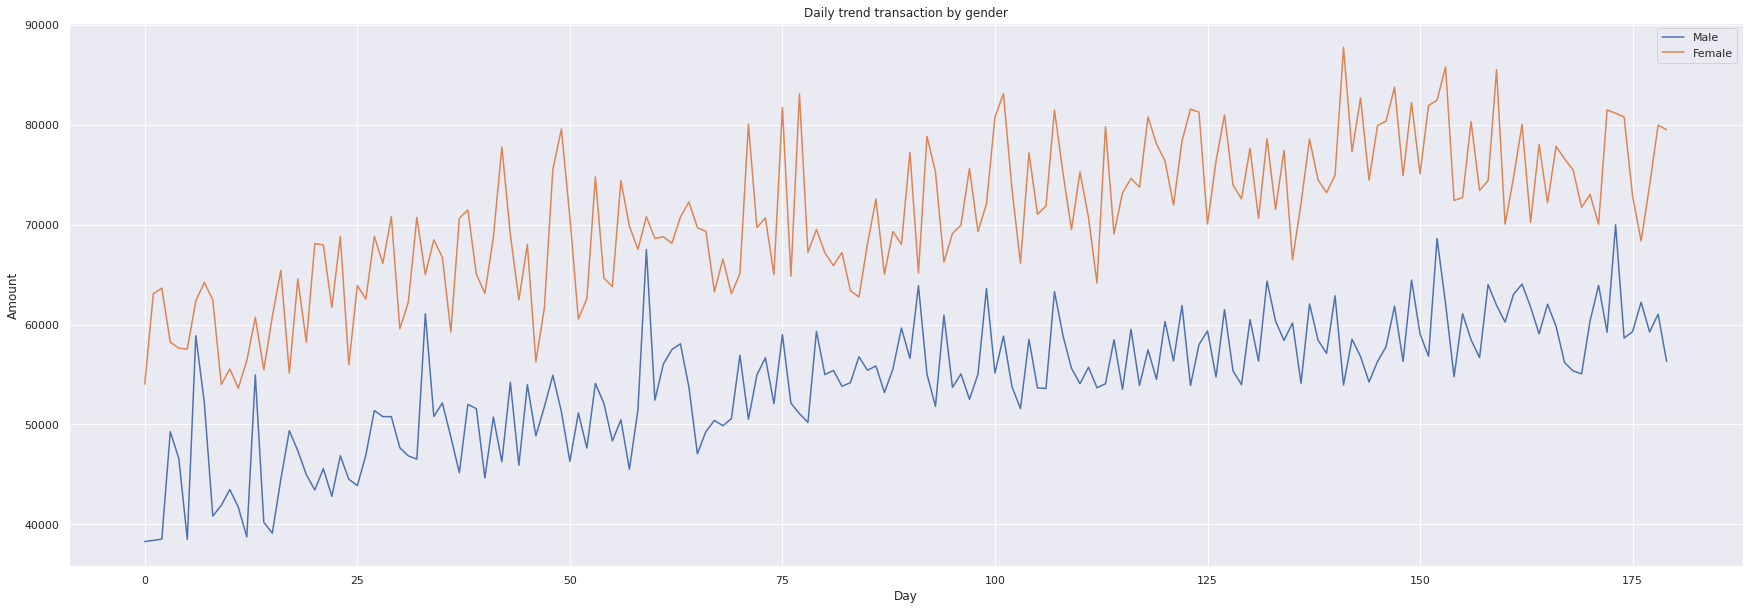

In [164]:
### Plot of the daily trend by gender
plt.figure(figsize=(30, 10))
line_chart1 = plt.plot(Data)
plt.title('Daily trend transaction by gender')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.legend(['Male', 'Female'])
plt.show()

The data show that women tends to purchase more than men. The trend is increasing for the two genders. None of them seems to reduce their purchases for the whole time.

# Daily trend by age

In [165]:
#createsimple dataframe with each needed columns
#create a data can give the daily trend transaction by Age by concatenation
day=project['day']
amount=project['amount']
age=project['age']
customer=project['customer']
Daily_trend_Transaction_By_Age= pd.concat([day,age,amount,customer], axis=1)

Daily_trend_Transaction_By_Age

,day,age,amount,customer
0,0,4,4.55,C1093826151
1,0,2,39.68,C352968107
2,0,4,26.89,C2054744914
3,0,3,17.25,C1760612790
4,0,5,35.72,C757503768
...,...,...,...,...
594638,179,3,20.53,C1753498738
594639,179,4,50.73,C650108285
594640,179,2,22.44,C123623130
594641,179,5,14.46,C1499363341


In [166]:
#Tranform values age in columns
Daily_trend_Transaction_By_Age1= pd.get_dummies(Daily_trend_Transaction_By_Age[["day","age","amount","customer"]], columns=['age'], prefix="", prefix_sep="")
Daily_trend_Transaction_By_Age1
#Daily_trend_Transaction_By_Age1

,day,amount,customer,0,1,2,3,4,5,6,U
0,0,4.55,C1093826151,0,0,0,0,1,0,0,0
1,0,39.68,C352968107,0,0,1,0,0,0,0,0
2,0,26.89,C2054744914,0,0,0,0,1,0,0,0
3,0,17.25,C1760612790,0,0,0,1,0,0,0,0
4,0,35.72,C757503768,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
594638,179,20.53,C1753498738,0,0,0,1,0,0,0,0
594639,179,50.73,C650108285,0,0,0,0,1,0,0,0
594640,179,22.44,C123623130,0,0,1,0,0,0,0,0
594641,179,14.46,C1499363341,0,0,0,0,0,1,0,0


In [167]:
#Add a columns Age_0 where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_0"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["0"]==1 ,"Age_0"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["0"]==1].amount
Daily_trend_Transaction_By_Age1["Age_0"]

#Add a columns Age_1 where every values== 1 in df["1"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_1"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["1"]==1 ,"Age_1"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["1"]==1].amount
Daily_trend_Transaction_By_Age1["Age_1"]


#Add a columns Age_2 where every values== 1 in df["2"] is  replace by amount values
Daily_trend_Transaction_By_Age1["Age_2"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["2"]==1 ,"Age_2"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["2"]==1].amount
Daily_trend_Transaction_By_Age1["Age_2"]


#Add a columns Age_3 where every values== 1 in df["3"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_3"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["3"]==1 ,"Age_3"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["3"]==1].amount
Daily_trend_Transaction_By_Age1["Age_3"]


#Add a columns Age_4 where every values== 1 in df["4"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_4"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["4"]==1 ,"Age_4"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["4"]==1].amount
Daily_trend_Transaction_By_Age1["Age_4"]



#Add a columns Age_5 where every values== 1 in df["5"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_5"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["5"]==1 ,"Age_5"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["5"]==1].amount
Daily_trend_Transaction_By_Age1["Age_5"]



#Add a columns Age_1 where every values== 1 in df["6"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_6"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["6"]==1 ,"Age_6"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["6"]==1].amount
Daily_trend_Transaction_By_Age1["Age_6"]



#Add a columns Age_1 where every values== 1 in df["U"] is replace by amount values
Daily_trend_Transaction_By_Age1["Age_U"] = 0.0
Daily_trend_Transaction_By_Age1.loc[Daily_trend_Transaction_By_Age1["U"]==1 ,"Age_U"]=Daily_trend_Transaction_By_Age1[Daily_trend_Transaction_By_Age1["U"]==1].amount
Daily_trend_Transaction_By_Age1["Age_U"]



#Build a dataframe with values male and Female
Age_0=Daily_trend_Transaction_By_Age1["Age_0"]
Age_1=Daily_trend_Transaction_By_Age1["Age_1"]
Age_2=Daily_trend_Transaction_By_Age1["Age_2"]
Age_3=Daily_trend_Transaction_By_Age1["Age_3"]
Age_4=Daily_trend_Transaction_By_Age1["Age_4"]
Age_5=Daily_trend_Transaction_By_Age1["Age_5"]
Age_6=Daily_trend_Transaction_By_Age1["Age_6"]
Age_U=Daily_trend_Transaction_By_Age1["Age_U"]
Date=Daily_trend_Transaction_By_Age1["day"]

#Concat each new created columns in a new dataframe
Daily_trend_Transaction_By_Age2=pd.concat([Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_U,day], axis=1)
print(Daily_trend_Transaction_By_Age2)


#Groub by date
registration_data1 =Daily_trend_Transaction_By_Age2.groupby(["day"]).sum()
print(registration_data1)


        Age_0  Age_1  Age_2  Age_3  Age_4  Age_5  Age_6  Age_U  day
0         0.0    0.0   0.00   0.00   4.55   0.00    0.0    0.0    0
1         0.0    0.0  39.68   0.00   0.00   0.00    0.0    0.0    0
2         0.0    0.0   0.00   0.00  26.89   0.00    0.0    0.0    0
3         0.0    0.0   0.00  17.25   0.00   0.00    0.0    0.0    0
4         0.0    0.0   0.00   0.00   0.00  35.72    0.0    0.0    0
...       ...    ...    ...    ...    ...    ...    ...    ...  ...
594638    0.0    0.0   0.00  20.53   0.00   0.00    0.0    0.0  179
594639    0.0    0.0   0.00   0.00  50.73   0.00    0.0    0.0  179
594640    0.0    0.0  22.44   0.00   0.00   0.00    0.0    0.0  179
594641    0.0    0.0   0.00   0.00   0.00  14.46    0.0    0.0  179
594642    0.0    0.0   0.00   0.00  26.93   0.00    0.0    0.0  179

[594643 rows x 9 columns]
       Age_0     Age_1     Age_2  ...     Age_5     Age_6   Age_U
day                               ...                            
0     311.49   8303.29  2

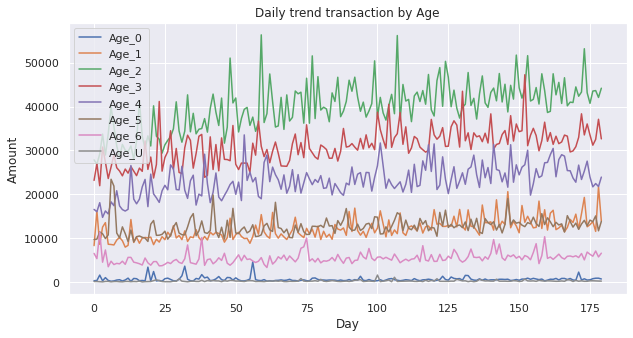

In [168]:
####Plot of the daily trend by age
plt.figure(figsize=(10, 5))
line_chart1 = plt.plot(registration_data1)
plt.title('Daily trend transaction by Age')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.legend(['Age_0',"Age_1","Age_2","Age_3","Age_4","Age_5","Age_6","Age_U"])
plt.show()

This graph shows that the credit cards that have 2 years and 3 years of use are more susceptible to be victim of fraud.

# Daily trend by category

In [169]:
#createsimple dataframe with each needed columns
#create a data can give the daily trend transaction by category by concatenation
day=project['day']
amount=project['amount']
category=project['category']
customer=project['customer']
Daily_trend_Transaction_By_Category= pd.concat([day,category,amount,customer], axis=1)

Daily_trend_Transaction_By_Category

,day,category,amount,customer
0,0,es_transportation,4.55,C1093826151
1,0,es_transportation,39.68,C352968107
2,0,es_transportation,26.89,C2054744914
3,0,es_transportation,17.25,C1760612790
4,0,es_transportation,35.72,C757503768
...,...,...,...,...
594638,179,es_transportation,20.53,C1753498738
594639,179,es_transportation,50.73,C650108285
594640,179,es_fashion,22.44,C123623130
594641,179,es_transportation,14.46,C1499363341


In [170]:
#Tranform values category in columns
Daily_trend_Transaction_By_Category1= pd.get_dummies(Daily_trend_Transaction_By_Category[["day","category","amount","customer"]], columns=['category'], prefix="", prefix_sep="")
Daily_trend_Transaction_By_Category1

#Daily_trend_Transaction_By_Category

,day,amount,customer,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
0,0,4.55,C1093826151,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,39.68,C352968107,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,26.89,C2054744914,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,17.25,C1760612790,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,35.72,C757503768,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,20.53,C1753498738,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
594639,179,50.73,C650108285,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
594640,179,22.44,C123623130,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
594641,179,14.46,C1499363341,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [171]:

#Daily_trend_transaction_By_Category1.columns

#Add a columns 'es_barsandrestaurants' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["barsandrestaurants"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_barsandrestaurants"]==1 ,"barsandrestaurants"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_barsandrestaurants"]==1].amount
Daily_trend_Transaction_By_Category1["barsandrestaurants"]



#Add a columns 'es_contents' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["contents"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_contents"]==1 ,"contents"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_contents"]==1].amount
Daily_trend_Transaction_By_Category1["contents"]



#Add a columns 'es_fashion' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["fashion"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_fashion"]==1 ,"fashion"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_fashion"]==1].amount
Daily_trend_Transaction_By_Category1["fashion"]


#Add a columns 'es_food' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["food"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_food"]==1 ,"food"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_food"]==1].amount
Daily_trend_Transaction_By_Category1["food"]


#Add a columns 'es_health' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["health"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_health"]==1 ,"health"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_health"]==1].amount
Daily_trend_Transaction_By_Category1["health"]


#Add a columns 	'es_home' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["home"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_home"]==1 ,"home"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_home"]==1].amount
Daily_trend_Transaction_By_Category1["home"]


#Add a columns 'es_hotelservices' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["hotelservices"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_hotelservices"]==1 ,"hotelsevices"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_hotelservices"]==1].amount
Daily_trend_Transaction_By_Category1["hotelservices"]


#Add a columns 'es_hyper' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["hyper"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_hyper"]==1 ,"hyper"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_hyper"]==1].amount
Daily_trend_Transaction_By_Category1["hyper"]


#Add a columns 'es_leisure' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["leisure"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_leisure"]==1 ,"leisure"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_leisure"]==1].amount
Daily_trend_Transaction_By_Category1["leisure"]


#Add a columns 'es_otherservices' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["otherservices"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_otherservices"]==1 ,"othersevices"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_otherservices"]==1].amount
Daily_trend_Transaction_By_Category1["otherservices"]


#Add a columns 'es_sportsandtoys' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["sportandtoys"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_sportsandtoys"]==1 ,"sportandtoys"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_sportsandtoys"]==1].amount
Daily_trend_Transaction_By_Category1["sportandtoys"]



#Add a columns 'es_tech' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["tech"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_tech"]==1 ,"tech"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_tech"]==1].amount
Daily_trend_Transaction_By_Category1["tech"]


#Add a columns 'es_transportation' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["transportation"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_transportation"]==1 ,"transportation"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_transportation"]==1].amount
Daily_trend_Transaction_By_Category1["transportation"]


#Add a columns 'es_travel' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["travel"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_travel"]==1 ,"travel"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_travel"]==1].amount
Daily_trend_Transaction_By_Category1["travel"]


#Add a columns 'es_wellnessandbeauty' where every values== 1 in df["0"] is replace by amount values
Daily_trend_Transaction_By_Category1["wellnessandbeauty"] = 0.0
Daily_trend_Transaction_By_Category1.loc[Daily_trend_Transaction_By_Category1["es_wellnessandbeauty"]==1 ,"wellnessandbeauty"]=Daily_trend_Transaction_By_Category1[Daily_trend_Transaction_By_Category1["es_wellnessandbeauty"]==1].amount
Daily_trend_Transaction_By_Category1["wellnessandbeauty"]



#Build a dataframe with values on those new columns
barandrestaurants=Daily_trend_Transaction_By_Category1["barsandrestaurants"]
fashion=Daily_trend_Transaction_By_Category1["fashion"]
contents=Daily_trend_Transaction_By_Category1["contents"]
food=Daily_trend_Transaction_By_Category1["food"]
health=Daily_trend_Transaction_By_Category1["health"]
home=Daily_trend_Transaction_By_Category1["home"]
hotelservices=Daily_trend_Transaction_By_Category1["hotelservices"]
hyper=Daily_trend_Transaction_By_Category1["hyper"]
leisure=Daily_trend_Transaction_By_Category1["leisure"]
otherservices=Daily_trend_Transaction_By_Category1["otherservices"]
sportandtoys=Daily_trend_Transaction_By_Category1["sportandtoys"]
tech=Daily_trend_Transaction_By_Category1["tech"]
transportation=Daily_trend_Transaction_By_Category1["transportation"]
travel=Daily_trend_Transaction_By_Category1["travel"]
wellnessandbeauty=Daily_trend_Transaction_By_Category1["wellnessandbeauty"]
day=Daily_trend_Transaction_By_Category1["day"]

#Concat each new created columns in a new dataframe
Daily_trend_Transaction_By_Category2=pd.concat([day,barandrestaurants,fashion,contents,food,health,home,hotelservices,hyper,leisure,otherservices,sportandtoys,tech,transportation,travel,wellnessandbeauty], axis=1)
print(Daily_trend_Transaction_By_Category2)


#Groub by date
registration_data2 =Daily_trend_Transaction_By_Category2.groupby(["day"]).sum()
print(registration_data2)

        day  barsandrestaurants  ...  travel  wellnessandbeauty
0         0                 0.0  ...     0.0                0.0
1         0                 0.0  ...     0.0                0.0
2         0                 0.0  ...     0.0                0.0
3         0                 0.0  ...     0.0                0.0
4         0                 0.0  ...     0.0                0.0
...     ...                 ...  ...     ...                ...
594638  179                 0.0  ...     0.0                0.0
594639  179                 0.0  ...     0.0                0.0
594640  179                 0.0  ...     0.0                0.0
594641  179                 0.0  ...     0.0                0.0
594642  179                 0.0  ...     0.0                0.0

[594643 rows x 16 columns]
     barsandrestaurants  fashion  ...    travel  wellnessandbeauty
day                               ...                             
0               1603.71  1620.88  ...   1993.68            6440.00
1  

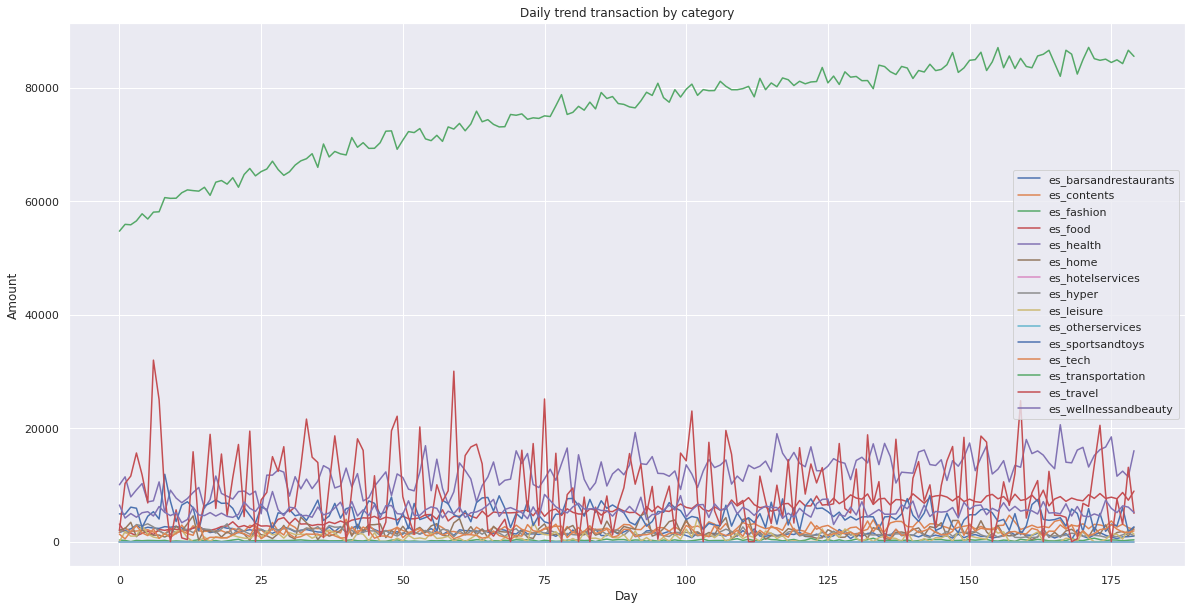

In [172]:
plt.figure(figsize=(20, 10))
line_chart1 = plt.plot(registration_data2)
plt.title('Daily trend transaction by category')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.legend(['es_barsandrestaurants',	'es_contents',	'es_fashion',	'es_food',	'es_health',	'es_home',	'es_hotelservices',	'es_hyper',	'es_leisure',	'es_otherservices',	'es_sportsandtoys',	'es_tech',	'es_transportation',	'es_travel',	'es_wellnessandbeauty'])
plt.show()

As we can see the daily trend for thansport is growing and it is higher than any other in amount. It's increasing. That means there are too many transactions in these categories. 

# **Statistical tests**

In [173]:
###Define a function  
def pivot_e(x):
  piv=pd.pivot_table(project,values="zipcodeOri", index=['fraud'], columns=[x], aggfunc="count")#fill_value =0))
  piv=piv.fillna(0)
  return piv

In [174]:
pivot_fraud_gender=pivot_e("gender")

In [175]:
project.head(2)

,day,customer,age,gender,zipcodeOri,merchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,es_transportation,39.68,0


# **Hypthesis Test**

# CHI_2 test

In [176]:

pivot_fraud_gender.values

array([[1.17100e+03, 3.19807e+05, 2.65950e+05, 5.15000e+02],
       [7.00000e+00, 4.75800e+03, 2.43500e+03, 0.00000e+00]])

Null Hypothesis H0: The two categorical variables are independent—that is, fraud is independent with gender.

Alternative Hypothesis Ha : The two categorical variables are not independent—that is, fraud is not independent with gender.

In [177]:
from scipy.stats import chi2_contingency
chi2_contingency(pivot_fraud_gender.values)
stat, p, dof, expected = chi2_contingency(pivot_fraud_gender.values)
  # interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('The two variables are dependent (reject Null Hypothesis H0)')
else:
    print('The two variables are independent (Null Hypothesis H0 holds true)')

p value is 5.878948827350995e-85
The two variables are dependent (reject Null Hypothesis H0)


pivot_fraud_category

In [178]:
pivot_fraud_category=pivot_e("category")

In [179]:
from scipy.stats import chi2_contingency
chi2_contingency(pivot_fraud_category.values)
stat, p, dof, expected = chi2_contingency(pivot_fraud_category.values)
  # interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('The two variables are dependent (reject Null Hypothesis H0)')
else:
    print('The two variables are independent (Null Hypothesis H0 holds true)')

p value is 0.0
The two variables are dependent (reject Null Hypothesis H0)


In [180]:
pivot_fraud_merchant=pivot_e("merchant")

In [181]:
pivot_fraud_merchant.values

array([[6.82100e+03, 2.10000e+01, 1.22200e+03, 7.00000e+00, 5.27000e+02,
        3.70000e+02, 1.40000e+01, 7.76000e+02, 2.20000e+02, 6.25300e+03,
        1.69400e+03, 2.62400e+03, 1.04900e+03, 3.00000e+00, 1.04000e+02,
        3.32000e+02, 2.38000e+02, 1.81000e+02, 2.99693e+05, 7.51000e+02,
        5.25000e+02, 3.40000e+01, 6.84000e+02, 3.98800e+03, 5.34300e+03,
        7.80000e+01, 1.20000e+01, 3.70800e+03, 1.41000e+02, 9.70000e+01,
        2.05426e+05, 2.88100e+03, 1.80000e+01, 5.73000e+02, 1.87400e+03,
        4.50000e+01, 8.70000e+02, 8.33000e+02, 3.58000e+02, 8.84000e+02,
        9.00000e+01, 1.56400e+03, 1.24100e+03, 5.81800e+03, 3.00000e+01,
        2.62540e+04, 2.21000e+02, 5.70000e+01, 5.99000e+02, 2.97000e+02],
       [0.00000e+00, 0.00000e+00, 3.58000e+02, 1.84000e+02, 0.00000e+00,
        0.00000e+00, 6.40000e+01, 0.00000e+00, 0.00000e+00, 1.20000e+02,
        1.74000e+02, 0.00000e+00, 1.24000e+02, 0.00000e+00, 1.78000e+02,
        1.96000e+02, 3.60000e+01, 0.00000e+00, 0.0

In [182]:
from scipy.stats import chi2_contingency
chi2_contingency(pivot_fraud_merchant.values)
stat, p, dof, expected = chi2_contingency(pivot_fraud_merchant.values)
  # interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('The two variables are dependent (reject Null Hypothesis H0)')
else:
    print('The two variables are independent (Null Hypothesis H0 holds true)')

p value is 0.0
The two variables are dependent (reject Null Hypothesis H0)


In [183]:
db_fraud1

,index,fraud
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
594638,594638,0
594639,594639,0
594640,594640,0
594641,594641,0


In [184]:
project['ZZ']=pd.cut(project.amount.values,90,ordered=True)

In [185]:
project

,day,customer,age,gender,zipcodeOri,merchant,category,amount,fraud,ZZ
0,0,C1093826151,4,M,28007,M348934600,es_transportation,4.55,0,"(-8.33, 92.555]"
1,0,C352968107,2,M,28007,M348934600,es_transportation,39.68,0,"(-8.33, 92.555]"
2,0,C2054744914,4,F,28007,M1823072687,es_transportation,26.89,0,"(-8.33, 92.555]"
3,0,C1760612790,3,M,28007,M348934600,es_transportation,17.25,0,"(-8.33, 92.555]"
4,0,C757503768,5,M,28007,M348934600,es_transportation,35.72,0,"(-8.33, 92.555]"
...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,28007,M1823072687,es_transportation,20.53,0,"(-8.33, 92.555]"
594639,179,C650108285,4,F,28007,M1823072687,es_transportation,50.73,0,"(-8.33, 92.555]"
594640,179,C123623130,2,F,28007,M349281107,es_fashion,22.44,0,"(-8.33, 92.555]"
594641,179,C1499363341,5,M,28007,M1823072687,es_transportation,14.46,0,"(-8.33, 92.555]"


In [186]:
# Summarise dataframe using pivot table: Fraud & Class of amount
fraud_amount_bank_pivot1=pd.pivot_table(project,values="zipcodeOri", index=['fraud',],
 columns=['ZZ'], aggfunc="count",fill_value =0)

Null Hypothesis H0: The two variables are independent—that is,
fraud is independent of the highest amount level.

Alternative Hypothesis Ha
: The two variables are not
independent—that is, fraud is not independent of the
highest amount level

In [187]:
# Apply Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(fraud_amount_bank_pivot1.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


# What are your thoughts on the fraudulent transactions?

I think that the fraudulents trasactions depends on variables. The CHI_2 Test shows that clearly. That means there is a specific gender, category, merchant which are more susceptible to be victim of fraud.

# Is there a threshold of the spent?

From our pivot table between the fraud and class of amount values, we can see that the amount of fraudulent transactions per class exceeds the amount of non-fraudulent transactions from the [277-370] dollar values.

# What are your recommendations to the bank's management and describe how your solution will help regain trust from customers?

1-Set up a system to help customers control their accounts and identify merchants with a high percentage of fraud. 
The results showed that the frauds are more in the area of transportation and in relation to a certain gender. Therefore, this application with continuous updates can help customers to be more informed.

2-Report as fraud all transactions that follow the trend of fraudulent transactions and wait for the customer's opinion before authorizing the transaction.
According to the data, the profiles that are the most victims of fraud are female and spend more than 1000 dollars in the transportation industry.
